# Single Layer Neural Network

## Steps:
 - Define Structure
 - initialize parameters
 - Forward Propagation
   $$Z^{[1]} =  W^{[1]} X + b^{[1]} $$ 
   $$A^{[1]} = \tanh(Z^{[1]}) $$
   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
   $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$


 - compute cost
    - $$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(\hat{y}^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{[2] (i)}\right) \large{)} \small $$
 - Backward Propagation
  ---------------------------------------------------------------------
  $$dZ^{[2]} =  A^{[2]} - Y  $$ 
  $$dW^{[2]} = \frac {1} {m} dZ^{[2]} A^{[1]T}  $$
  $$db^{[2]} = \frac {1} {m} \sum\limits_{i = 1}^{m} dZ^{[2]}  $$
  ---------------------------------------------------------------------
  $$dW^{[2]} = \frac {1} {m} dZ^{[2]} A^{[1]T}  $$
  $$dZ^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
  $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$
 - update weights

In [ ]:
import tensorflow as tf

## Defining Structure and initializing parameters

In [ ]:
def initializer(input_dim:int, hidden:int, output_dim:int):
    W1 = tf.random.normal([hidden, input_dim], dtype=tf.float64)
    b1 = tf.zeros([hidden, 1], dtype=tf.float64)
    W2 = tf.random.normal([output_dim, hidden], dtype=tf.float64)
    b2 = tf.zeros([output_dim, 1], dtype=tf.float64)
    return {
        'W1':W1, "b1": b1, "W2": W2, "b2": b2
    }

In [ ]:
initializer(2, 4, 1)

## forward propagation
---------------------------------------
   $$Z^{[1]} =  W^{[1]} X + b^{[1]} $$ 
   $$A^{[1]} = \tanh(Z^{[1]}) $$
   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
   $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]}) $$


In [ ]:
def forward_prop(params: dict, X:tf.Tensor):
    W1, b1, W2, b2 = params.values()
    Z1 = tf.tensordot(W1, X, axes=1) + b1
    A1 = tf.nn.tanh(Z1)
    Z2 = tf.tensordot(W2, A1, axes=1) + b2
    A2 = tf.nn.sigmoid(Z2)
    state = {
        "Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2
    }
    return A2, state

In [ ]:
X = tf.Variable(
    [
        [2, 3, 4, 5, 6],
        [7, 2, 3, 4, 8],
    ], dtype=tf.float64
)
Y = tf.Variable([[1, 1, 0, 0, 1]], dtype=tf.float64)

In [ ]:
params = initializer(2, 4, 1)
forward_prop(params, X)


## Back Propagation

In [ ]:
def back_prop(params: dict, state: dict, X: tf.Tensor, Y: tf.Tensor):
    W1, b1, W2, b2 = params.values()
    Z1, A1, Z2, A2 = state.values()
    m = Y.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * tf.tensordot(dZ2, tf.transpose(A1), axes=1)
    db2 = (1/m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
    dZ1 = tf.tensordot(tf.transpose(W2), dZ2, axes=1) * (1 - tf.pow(A1, 2))
    dW1 = (1/m) * tf.tensordot(dZ1, tf.transpose(X), axes=1)
    db1 = (1/m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)
    grads = {
        'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2
    }
    return grads

In [ ]:
params = initializer(2, 4, 1)
A2, state = forward_prop(params, X)
back_prop(params, state, X, Y)

## Update Parameters:
$$ w1 = w1 - {\alpha} * \frac{\partial J}{\partial w1} $$
$$ b1 = b1- {\alpha}  * \frac{\partial J}{\partial b1} $$
$$ w2 = w2 - {\alpha} * \frac{\partial J}{\partial w2} $$
$$ b2 = b2- {\alpha}  * \frac{\partial J}{\partial b2} $$

In [ ]:
def update(params: dict, grads: dict, alpha: float = 0.01):
    W1, b1, W2, b2 = params.values()
    dW1, db1, dW2, db2 = grads.values()
    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1)
    W2 = W2 - (alpha * dW2)
    b2 = b2 - (alpha * db2)
    return dict(W1=W1, b1=b1, W2=W2, b2=b2)

In [ ]:
params = initializer(2, 4, 1)
A2, state = forward_prop(params, X)
grads = back_prop(params, state, X, Y)
update(params, grads)

## Merging All

In [ ]:
from sklearn.metrics import accuracy_score

In [97]:
class ShallowNN:
    """
    Parameters: input_dim : No of Fetures, hidden_dim : neuron in hidden layer, 
    output_dim: no of output neuron
    """

    def __init__(self, input_dim: int, hidden: int, output_dim: int, alpha: float = 0.01):
        self.params = self.initialize_params(input_dim, hidden, output_dim)
        self.state = dict()
        self.grads = dict()
        self.cost = None
        self.alpha = alpha
        self.losses = []

    def initialize_params(self, input_dim: int, hidden: int, output_dim: int):
        W1 = tf.random.normal([hidden, input_dim], dtype=tf.float64)
        b1 = tf.zeros([hidden, 1], dtype=tf.float64)
        W2 = tf.random.normal([output_dim, hidden], dtype=tf.float64)
        b2 = tf.zeros([output_dim, 1], dtype=tf.float64)
        return {
            'W1': W1, "b1": b1, "W2": W2, "b2": b2
        }

    def forward_prop(self,  X: tf.Tensor):
        W1, b1, W2, b2 = self.params.values()
        Z1 = tf.tensordot(W1, X, axes=1) + b1
        A1 = tf.nn.tanh(Z1)
        Z2 = tf.tensordot(W2, A1, axes=1) + b2
        A2 = tf.nn.sigmoid(Z2)
        state = {
            "Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2
        }
        return A2, state

    def compute_cost(self, Y: tf.Tensor, Yhat: tf.Tensor):
        m = Yhat.shape[1]
        loss = tf.reduce_sum((Y * tf.math.log(Yhat)) +
                             ((1-Y) * tf.math.log(1-Yhat)))
        cost = (-1/m) * loss
        return cost

    def back_prop(self, X: tf.Tensor, Y: tf.Tensor):
        W1, b1, W2, b2 = self.params.values()
        Z1, A1, Z2, A2 = self.state.values()
        m = Y.shape[1]

        dZ2 = A2 - Y
        dW2 = (1/m) * tf.tensordot(dZ2, tf.transpose(A1), axes=1)
        db2 = (1/m) * tf.reduce_sum(dZ2, axis=1, keepdims=True)
        dZ1 = tf.tensordot(tf.transpose(W2), dZ2, axes=1) * (1 - tf.pow(A1, 2))
        dW1 = (1/m) * tf.tensordot(dZ1, tf.transpose(X), axes=1)
        db1 = (1/m) * tf.reduce_sum(dZ1, axis=1, keepdims=True)
        grads = {
            'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2
        }
        return grads

    def state_update(self):
        W1, b1, W2, b2 = self.params.values()
        dW1, db1, dW2, db2 = self.grads.values()
        W1 = W1 - (self.alpha * dW1)
        b1 = b1 - (self.alpha * db1)
        W2 = W2 - (self.alpha * dW2)
        b2 = b2 - (self.alpha * db2)
        return dict(W1=W1, b1=b1, W2=W2, b2=b2)

    def optimize(self, X: tf.Tensor, Y: tf.Tensor, validation: tuple, epochs=100):
        for epoch in range(epochs):
            A2, self.state = self.forward_prop(X)
            self.cost = self.compute_cost(Y, A2)
            self.grads = self.back_prop(X, Y)
            self.params = self.state_update()

            # Model State
            if epoch % 50 == 0:
                self.losses.append(self.cost)
                Xv, Yv = validation
                train_acc = 100 - \
                    (tf.reduce_mean(tf.abs(tf.subtract(self.predict(X), Y)) * 100))
                test_acc = 100 - \
                    (tf.reduce_mean(tf.abs(tf.subtract(self.predict(Xv), Yv)) * 100))
                print(
                    f"Epoch: {epoch} || Cost: {self.cost:.4f} || Train Acc: {train_acc:.2f}% || Test Acc: {test_acc:.2f}%")
        return self.params, self.cost

    def predict(self, X: tf.Tensor):
        W1, b1, W2, b2 = self.params.values()
        Z1 = tf.tensordot(W1, X, axes=1) + b1
        A1 = tf.nn.tanh(Z1)
        Z2 = tf.tensordot(W2, A1, axes=1) + b2
        A2 = tf.nn.sigmoid(Z2)
        return tf.round(A2)


## Test MOdel

In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X, Y = load_breast_cancer(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [99]:
xtrain = StandardScaler().fit_transform(xtrain)
xtrain = tf.Variable(xtrain, dtype=tf.float64)
ytrain = tf.Variable([ytrain], dtype=tf.float64)
xtrain = tf.transpose(xtrain)
xtrain.shape


TensorShape([30, 426])

In [100]:
xtest = StandardScaler().fit_transform(xtest)
xtest = tf.Variable(xtest, dtype=tf.float64)
ytest = tf.Variable([ytest], dtype=tf.float64)
xtest = tf.transpose(xtest)
xtest.shape

TensorShape([30, 143])

In [101]:
nn2 = ShallowNN(30, 5, 1, alpha=0.09)
nn2.optimize(xtrain, ytrain,validation=(xtest, ytest), epochs=3000)

Epoch: 0 || Cost: 0.4065 || Train Acc: 83.33% || Test Acc: 83.22%
Epoch: 50 || Cost: 0.2382 || Train Acc: 89.67% || Test Acc: 90.91%
Epoch: 100 || Cost: 0.1788 || Train Acc: 92.96% || Test Acc: 93.71%
Epoch: 150 || Cost: 0.1370 || Train Acc: 96.01% || Test Acc: 96.50%
Epoch: 200 || Cost: 0.1158 || Train Acc: 95.77% || Test Acc: 96.50%
Epoch: 250 || Cost: 0.1017 || Train Acc: 96.24% || Test Acc: 97.20%
Epoch: 300 || Cost: 0.0897 || Train Acc: 96.95% || Test Acc: 97.90%
Epoch: 350 || Cost: 0.0826 || Train Acc: 96.95% || Test Acc: 96.50%
Epoch: 400 || Cost: 0.0773 || Train Acc: 97.18% || Test Acc: 96.50%
Epoch: 450 || Cost: 0.0727 || Train Acc: 97.65% || Test Acc: 95.80%
Epoch: 500 || Cost: 0.0687 || Train Acc: 97.65% || Test Acc: 96.50%
Epoch: 550 || Cost: 0.0653 || Train Acc: 97.65% || Test Acc: 96.50%
Epoch: 600 || Cost: 0.0623 || Train Acc: 97.89% || Test Acc: 96.50%
Epoch: 650 || Cost: 0.0596 || Train Acc: 97.89% || Test Acc: 96.50%
Epoch: 700 || Cost: 0.0572 || Train Acc: 98.36% || 

({'W1': <tf.Tensor: shape=(5, 30), dtype=float64, numpy=
  array([[ 1.22281605, -0.34709099,  0.0441851 , -0.73012135,  1.01101067,
           0.66412706,  0.70735601,  0.97763945, -1.53248233, -0.8551321 ,
           0.33233017, -0.13288302, -0.99870741,  1.10116511, -0.04393048,
          -0.33373319, -0.38381137,  0.11495413,  1.03152692, -0.66610759,
           0.90113618,  1.78071192,  2.38113511,  1.6934567 ,  0.89141004,
          -1.64587208,  0.82596758, -0.36877805,  0.23068481,  1.29458874],
         [-0.05821146, -0.96369363, -0.22641339, -2.32387569, -0.94257449,
           0.85890723, -1.73520805,  0.26550869, -0.60778746,  0.24093254,
           1.24984618, -0.03302411, -0.93069556, -0.20153626, -0.34123845,
           0.44646674,  0.08378925, -0.92181268,  0.79395167, -0.7640713 ,
          -1.24994477,  1.42744105, -0.85223774,  0.95741312,  0.96794923,
          -0.50670594, -0.82058107, -1.0432927 , -0.27031727, -1.41389373],
         [-1.01342593, -1.08366073, -1.27

Text(0, 0.5, 'Cost')

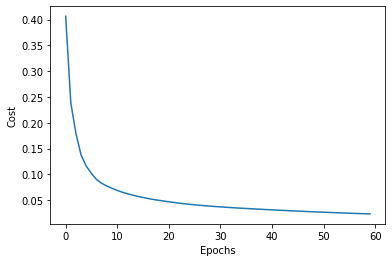

In [105]:
import matplotlib.pyplot as plt
plt.plot(nn2.losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")

In [106]:
## Plot Train adn Test Accuracies